In [36]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
plt.style.use("fivethirtyeight")

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#np.random.seed(1337)
np.random.seed()

In [18]:
N = 100

X = np.hstack((np.random.randn(N,1), np.random.randn(N,1)*100, np.random.randn(N,1)*2))
W = np.array([1.8, 0.5,-0.3])
bias = 1.4

y = np.dot(X,W) + bias

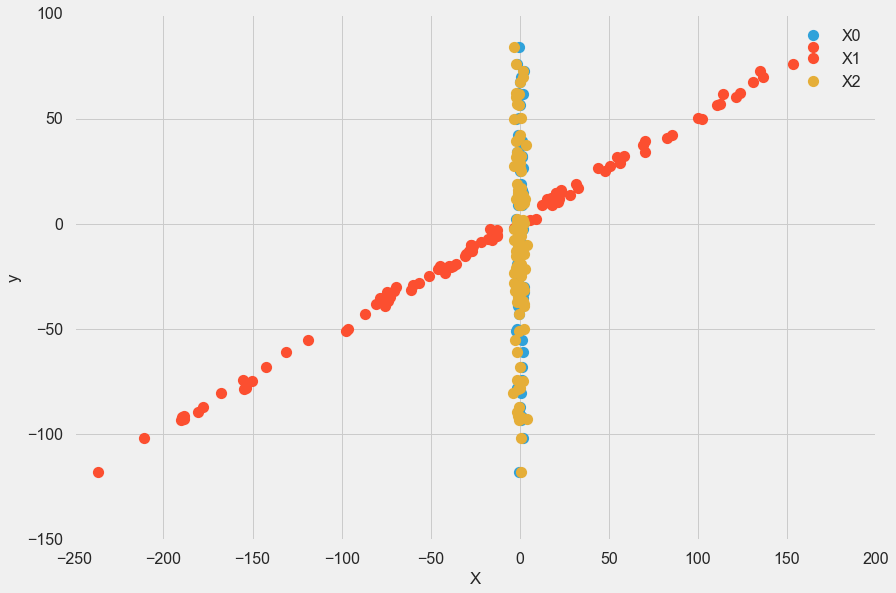

In [22]:
plt.plot(X[:,0], y, "o", label="X0")
plt.plot(X[:,1], y, "o", label="X1")
plt.plot(X[:,2], y, "o", label="X2")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [23]:
# Standardise all variables
X_standard = (X - X.mean(axis=0))/X.std(axis=0)
y_standard = (y - y.mean(axis=0))/y.std(axis=0)

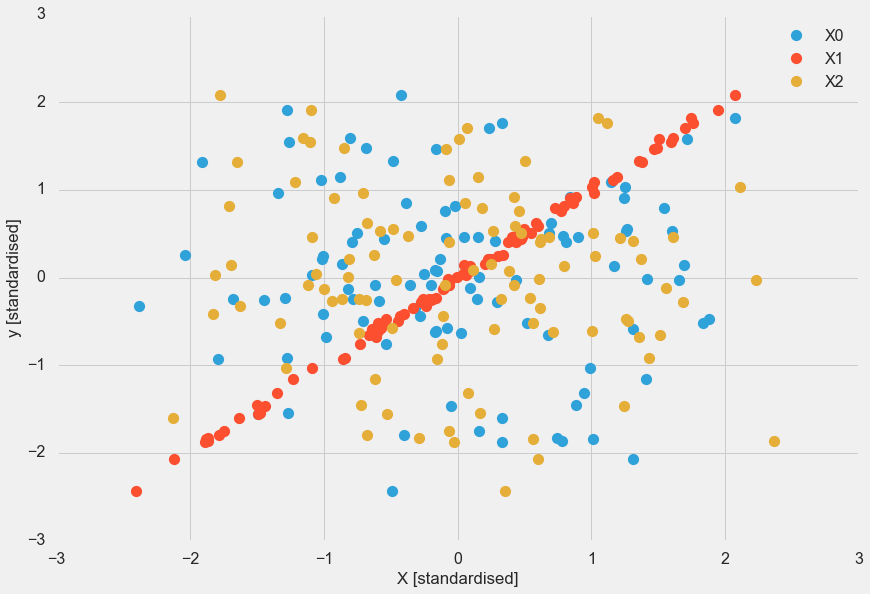

In [24]:
plt.plot(X_standard[:,0], y_standard, "o", label="X0")
plt.plot(X_standard[:,1], y_standard, "o", label="X1")
plt.plot(X_standard[:,2], y_standard, "o", label="X2")
plt.xlabel("X [standardised]")
plt.ylabel("y [standardised]")
plt.legend()

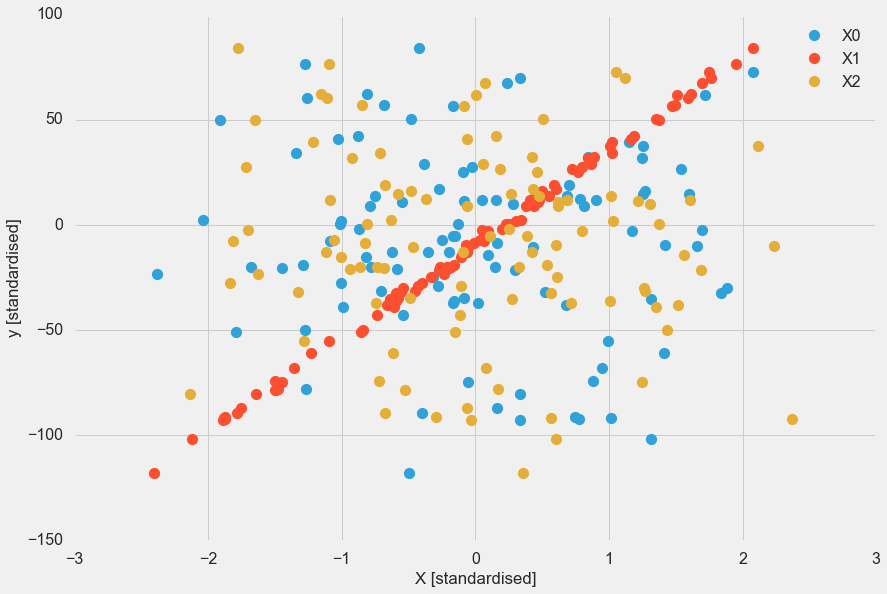

In [34]:
plt.plot(X_standard[:,0], y, "o", label="X0")
plt.plot(X_standard[:,1], y, "o", label="X1")
plt.plot(X_standard[:,2], y, "o", label="X2")
plt.xlabel("X [standardised]")
plt.ylabel("y [standardised]")
plt.legend()

In [29]:
model = OLS(y, sm.add_constant(X))
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.259e+32
Date:                Fri, 26 Feb 2016   Prob (F-statistic):               0.00
Time:                        00:59:14   Log-Likelihood:                 3000.4
No. Observations:                 100   AIC:                            -5993.
Df Residuals:                      96   BIC:                            -5982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4000    2.4e-15   5.84e+14      0.0

In [30]:
model = OLS(y_standard, sm.add_constant(X_standard))
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.284e+31
Date:                Fri, 26 Feb 2016   Prob (F-statistic):               0.00
Time:                        00:59:49   Log-Likelihood:                 3313.3
No. Observations:                 100   AIC:                            -6619.
Df Residuals:                      96   BIC:                            -6608.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const               0   1.01e-16          0      1.0

In [33]:
model = OLS(y, sm.add_constant(X_standard))
res = model.fit_regularized(L1_wt=0, alpha=0.1) # Ridge regression
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3635.
Date:                Fri, 26 Feb 2016   Prob (F-statistic):           1.14e-98
Time:                        01:35:26   Log-Likelihood:                -284.87
No. Observations:                 100   AIC:                             577.7
Df Residuals:                      96   BIC:                             588.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.1647      0.426    -19.149      0.0

In [35]:
model = OLS(y, sm.add_constant(X_standard))
res = model.fit_regularized(L1_wt=1, alpha=0.1) # Ridge regression
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.399e+06
Date:                Fri, 26 Feb 2016   Prob (F-statistic):          1.40e-222
Time:                        01:37:02   Log-Likelihood:                 12.336
No. Observations:                 100   AIC:                            -16.67
Df Residuals:                      96   BIC:                            -6.251
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.8812      0.022   -406.836      0.0